In [34]:
import pandas as pd

In [35]:
df = pd.read_csv("/home/r4ph/desenv/exception-miner-multi/llm/flask_llm.csv")

In [36]:
def get_first_word_before_comma(text):
    # Find the position of the first comma
    comma_index = text.find(',')

    # If there's no comma, return -1 to indicate an invalid result
    if comma_index == -1:
        return -1

    # Extract the substring before the comma
    first_part = text[:comma_index]

    # Split the substring to get the first word
    first_word = first_part.split()[0]

    # Check for "Yes/yes" or "No/no"
    if first_word.lower() == "yes":
        return 1
    elif first_word.lower() == "no":
        return 0
    else:
        return -1

In [37]:
df['llm_resp_binary'] = df['llm_response'].apply(get_first_word_before_comma)

In [38]:
df[df['llm_resp_binary'] == -1]

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,str_except_identifiers,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,str_code_without_try_except,project,llm_response,llm_resp_binary
60,/home/r4ph/desenv/exception-miner-multi/projec...,gen,def gen():\n yield flask.sessio...,NaN,0,0,0,0,0,0,...,NaN,NaN,NaN,0,0,0,NaN,flask,\nYes. The `gen` function does not have any ex...,-1


In [39]:
df.groupby(['n_try_except', 'llm_resp_binary']).count()

file  function  func_body  \
n_try_except llm_resp_binary                              
0            -1                  1         1          1   
              0                 11        11         11   
              1                 33        33         33   
1             0                  2         2          2   
              1                 43        43         43   

                              str_uncaught_exceptions  n_try_pass  n_finally  \
n_try_except llm_resp_binary                                                   
0            -1                                     0           1          1   
              0                                     0          11         11   
              1                                     0          33         33   
1             0                                     0           2          2   
              1                                     0          43         43   

                              n_generic_except  n_raise  \
n_try_except llm_resp_binary                              
0            -1                              1        1   
              0                             11       11   
              1                             33       33   
1             0                              2        2   
              1                             43       43   

                              n_captures_broad_raise  \
n_try_except llm_resp_binary                           
0            -1                                    1   
              0                                   11   
              1                                   33   
1             0                                    2   
              1                                   43   

                              n_captures_try_except_raise  ...  n_try_return  \
n_try_except llm_resp_binary                               ...                 
0            -1                                         1  ...             1   
              0                                        11  ...            11   
              1                                        33  ...            33   
1             0                                         2  ...             2   
              1                                        43  ...            43   

                              str_except_identifiers  str_raise_identifiers  \
n_try_except llm_resp_binary                                                  
0            -1                                    0                      0   
              0                                    0                      0   
              1                                    0                      3   
1             0                                    2                      1   
              1                                   43                     21   

                              str_except_block  n_nested_try  n_bare_except  \
n_try_except llm_resp_binary                                                  
0            -1                              0             1              1   
              0                              0            11             11   
              1                              0            33             33   
1             0                              2             2              2   
              1                             43            43             43   

                              n_bare_raise_finally  \
n_try_except llm_resp_binary                         
0            -1                                  1   
              0                                 11   
              1                                 33   
1             0                                  2   
              1                                 43   

                              str_code_without_try_except  project  \
n_try_except llm_resp_binary                                         
0            -1                                         0   

In [42]:
df_matrix = df[df['llm_resp_binary'] != -1]
df_matrix.shape

(89, 24)

In [43]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = df_matrix['n_try_except']
y_pred = df_matrix['llm_resp_binary']

# Calculate metrics
accuracy = accuracy_score(X, y_pred)
precision = precision_score(X, y_pred)
recall = recall_score(X, y_pred)
f_measure = f1_score(X, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f_measure:.2f}")

# Optionally, display the confusion matrix
cm = confusion_matrix(X, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.61
Precision: 0.57
Recall: 0.96
F-measure: 0.71

Confusion Matrix:
[[11 33]
 [ 2 43]]


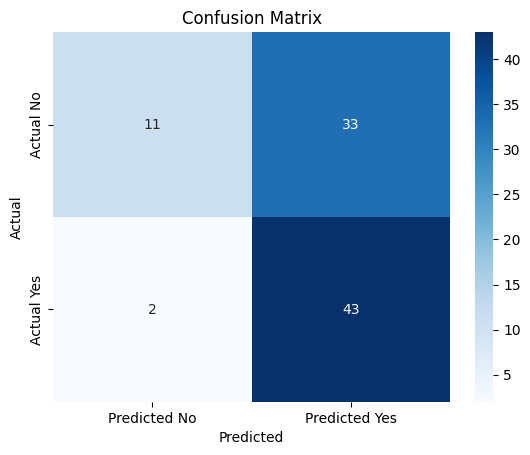

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
